<a href="https://colab.research.google.com/github/efenussmjtk/ML-Models/blob/main/W1_House_Pricing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Business & Data Understanding

## Load datasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

plt.style.use('seaborn-v0_8-whitegrid')
sns.set(rc={'figure.figsize':(15, 8)})

In [ ]:
# Load datasets
df_train = pd.read_csv("./train.csv")

# Display top 5 data
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Check the dataset info

In [ ]:
# Display datasets info
df_train.info()

# Get counts of each dtype
dtype_counts = df_train.dtypes.value_counts()
print("\nData type counts:\n", dtype_counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Display total rows and features
print('Total rows:', df_train.shape[0])
print('Total features:', df_train.shape[1])

Total rows: 1460
Total features: 81


## Get the features list: numerical, categorial

In [ ]:
# Get numerical columns (int and float)
numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nNumerical columns:\n", numerical_cols)
print("\n")

# Summary statistics for numerical features
print(df_train.describe())


Numerical columns:
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
5

In [ ]:
# Get categorical columns (object and category)
categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical columns:\n", categorical_cols)
print("\n")

# Summary for categorical features
print(df_train.describe(include=['O']))


Categorical columns:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood

# 2. Data Cleaning & Analysis

## Data Analysis

bisa lakukan analisis korelasi --> pembobotan untuk menilai seberapa besar hubungan antar fitur untuk menentukan harga rumah

### Data Analysis: distribution of house class

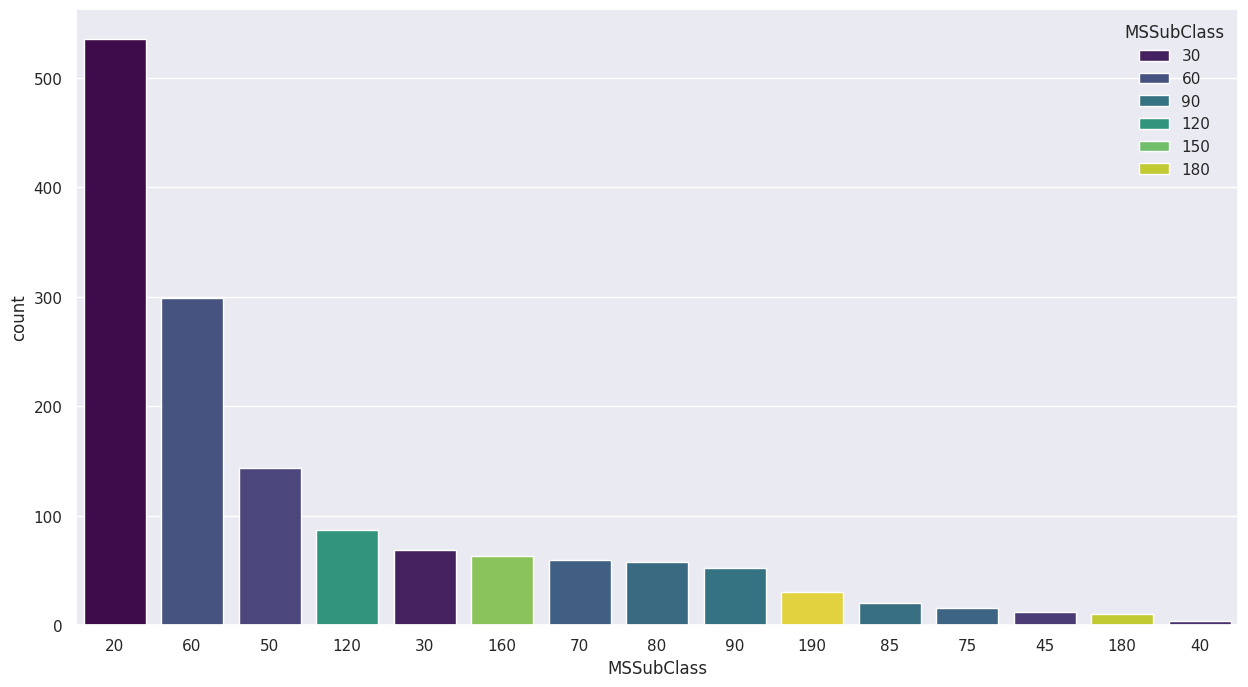

<Figure size 2000x2000 with 0 Axes>

In [ ]:
# Display distribution of the houses based on the type/class

order = df_train['MSSubClass'].value_counts().index
sns.countplot(x='MSSubClass', data=df_train, order=order, hue='MSSubClass', palette='viridis')
plt.figure(figsize=(20, 20))
plt.show()

### Data Analysis: distribution of house zone

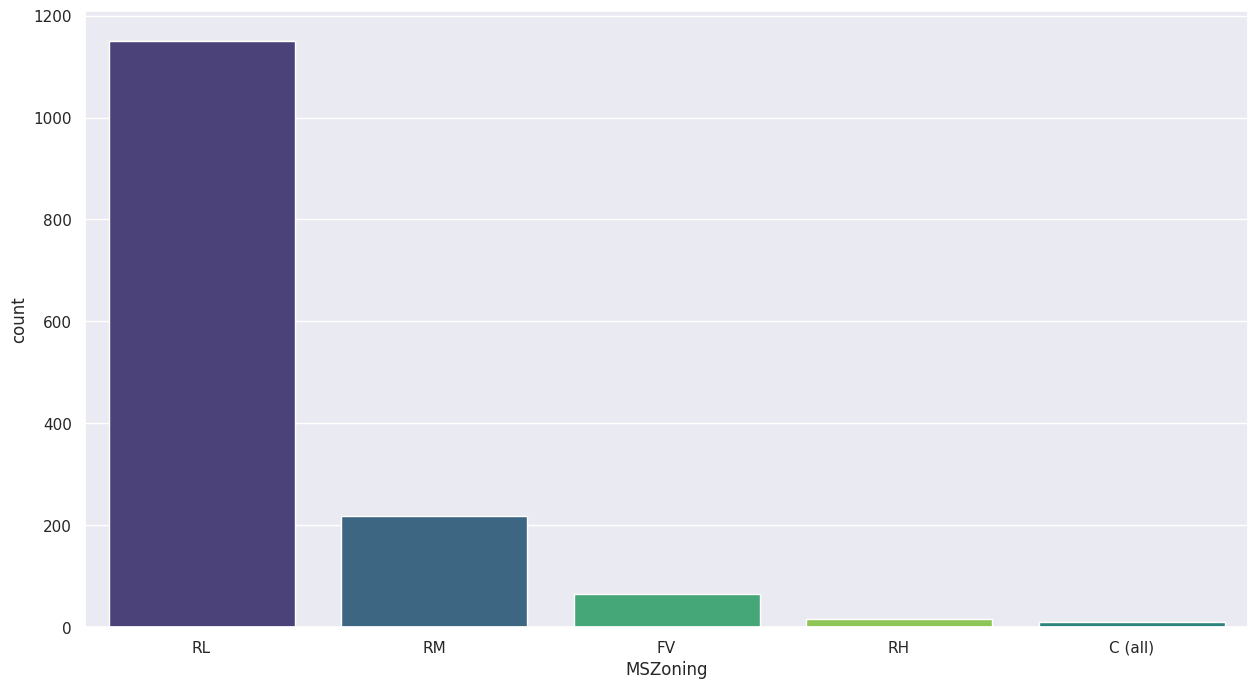

<Figure size 2000x2000 with 0 Axes>

In [ ]:
# Display ditribution of the houses based on the zoning area
order = df_train['MSZoning'].value_counts().index
sns.countplot(x='MSZoning', data=df_train, order=order, hue='MSZoning', palette='viridis')
plt.figure(figsize=(20, 20))
plt.show()

# RL	Residential Low Density
# RM	Residential Medium Density
# FV	Floating Village Residential
# RH	Residential High Density
# C	  Commercial

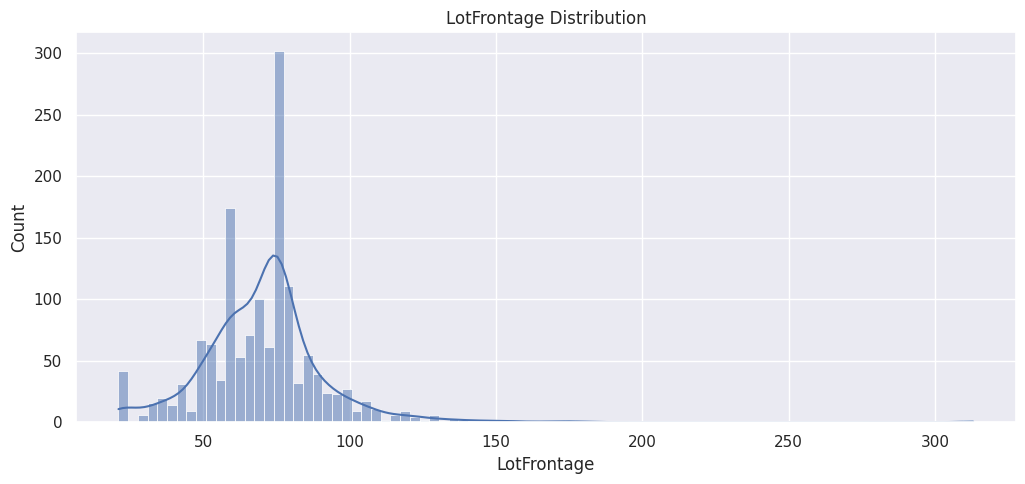

In [ ]:
# Plot histogram and boxplot for SalePrice
plt.figure(figsize=(20, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_train['LotFrontage'], kde=True)
plt.title('LotFrontage Distribution')

plt.tight_layout()
plt.show()

Skewness: 1.8828757597682129


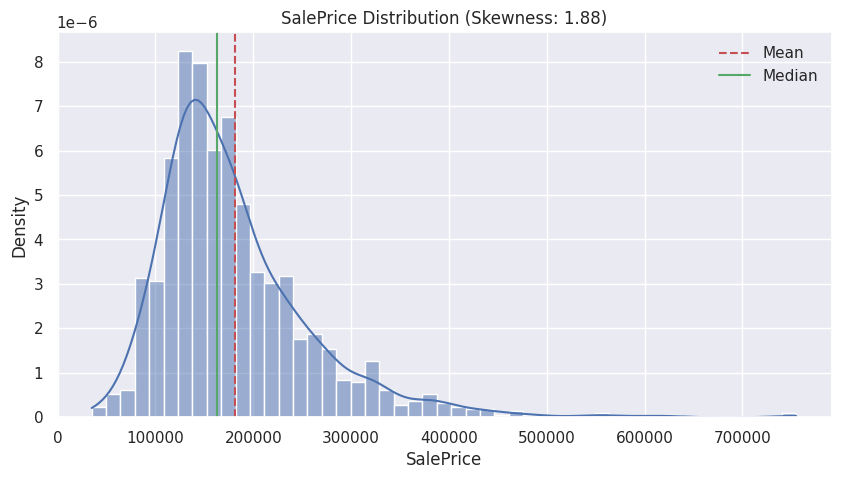

In [ ]:
# Check skewness value
skewness = df_train['SalePrice'].skew()
print(f"Skewness: {skewness}")

# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_train['SalePrice'], kde=True, stat='density')
plt.axvline(df_train['SalePrice'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df_train['SalePrice'].median(), color='g', linestyle='-', label='Median')
plt.legend()
plt.title(f'SalePrice Distribution (Skewness: {skewness:.2f})')
plt.show()

In [ ]:
# Normalisasi perlu dilakukan bergantung pada model yg mau dibuat. Untuk model yg berbasis tree (tidak sensitif pada skala data), tidak perlu dilakukan normalisasi
# df_train['SalePrice_log'] = np.log1p(df_train['SalePrice'])
# sns.histplot(df_train['SalePrice_log'], kde=True)

#print(f"New Skewness: {df_train['SalePrice_log'].skew()}")

## Preprocess Missing Values

### Replace "NA" values in Categorical Features

In [ ]:
# For feature 'Alley', "NA" means "No Alley Access"
df_train['Alley'] = df_train['Alley'].fillna('Naa')

In [ ]:
# For feature 'PoolQC', "NA" means "No Pool"
df_train['PoolQC'] = df_train['PoolQC'].fillna('NP')

In [ ]:
# For feature 'Fence', "NA" means "No Fence"
df_train['Fence'] = df_train['Fence'].fillna('NF')

In [ ]:
# For feature 'MiscFeature', "NA" means "No Miscellaneous Feature"
df_train['MiscFeature'] = df_train['MiscFeature'].fillna('None')

In [ ]:
# For feature 'MasVnrType', "NA" means missing value. "None" means "No Veneer Type"
# Since the number of "NA" = 8, it will be filled in as "None"
df_train['MasVnrType'] = df_train['MasVnrType'].fillna('None')

In [ ]:
# For feature 'FireplaceQu', "NA" means "No Fireplace"
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('NF')

In [ ]:
# For feature 'Garage', "NA" means "No Garage"
df_train['GarageFinish'] = df_train['GarageFinish'].fillna('NG')
df_train['GarageQual'] = df_train['GarageQual'].fillna('NG')
df_train['GarageType'] = df_train['GarageType'].fillna('NG')
df_train['GarageCond'] = df_train['GarageCond'].fillna('NG')

In [ ]:
# For feature 'Basement', "NA" means "No Basement"
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna('NB')
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna('NB')
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna('NB')
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna('NB')
df_train['BsmtQual'] = df_train['BsmtQual'].fillna('NB')
df_train['BsmtCond'] = df_train['BsmtCond'].fillna('NB')

In [ ]:
# For feature 'Electrical', no valid value for "NA"
# Drop rows where 'electrical' is NaN/blank -->
# opsi lain bisa diisi dengan nilai modus value2 yg ada di feature tersebut dan penentuan pakai modus, mean atau median, ditentukan berdasarkan skew distribusi datanya
df_train = df_train.dropna(subset=['Electrical'])

In [ ]:
# Create a DataFrame summarizing null values
null_summary = pd.DataFrame({
    'Column': df_train.columns,
    'Null_Count': df_train.isnull().sum(),
    'Null_Percentage': (df_train.isnull().mean() * 100).round(2)
})

# Filter only columns with nulls and sort by count
null_summary = null_summary[null_summary['Null_Count'] > 0] \
               .sort_values('Null_Count', ascending=False)

print("Null Value Summary:\n", null_summary)

Null Value Summary:
                   Column  Null_Count  Null_Percentage
LotFrontage  LotFrontage         259            17.75
GarageYrBlt  GarageYrBlt          81             5.55
MasVnrArea    MasVnrArea           8             0.55


### Replace Null values in Numerical Features

In [ ]:
# 1. GarageYrBlt --> 81 Row due to No Garage. Update as "0000" --> bisa cek skewness nya dulu untuk menentukan imputasi menggunakan mean (mendekati simetris), median, modus
# 2. MasVnrArea --> 8 Row due to No Veener Type
# 3. Fill missing values with the corresponding zone means

# Calculate mean LotFrontage for each MSZoning group
zone_means = df_train.groupby('MSZoning')['LotFrontage'].transform('mean')

df_train = df_train.assign(
    GarageYrBlt=df_train['GarageYrBlt'].fillna(0.0),
    MasVnrArea=df_train['MasVnrArea'].fillna(0),
    LotFrontage=df_train['LotFrontage'].fillna(zone_means)
)

In [ ]:
# Check remaining missing values
print("Remaining missing values in TRAIN:", df_train.isnull().sum().sum())

Remaining missing values in TRAIN: 0


## Transform Categorical Data

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallCond  

In [ ]:
# atau bisa pakai fungsi yg di library onehotencoder sebagai best practice
df_train_cleaned_2 = pd.get_dummies(df_train, columns=categorical_cols)
df_train_cleaned_2.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
df_train_cleaned_2.columns.values

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'MSZoning_C (all)', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl',
       'Street_Pave', 'Alley_Grvl', 'Alley_Naa', 'Alley_Pave',
       'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa',
       'LotConfig_Corner', 'LotConfig_CulDSac', 'Lot

## Prepare Features & Labels

# 3. Data Modeling

## Split data: training, testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
data_vars = df_train_cleaned_2.columns.values.tolist()
y = ['SalePrice']
X = [i for i in data_vars if i not in y]

In [ ]:
# random_state = diisi dengan value apapun akan buat pembagian datanya selalu tetap sama setiap kali dirunning ulang
X_train, X_test, y_train, y_test = train_test_split(df_train_cleaned_2[X], df_train_cleaned_2[y], test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1167, 303)

In [ ]:
X_test.shape

(292, 303)

## Build Model using Random Forest

In [ ]:
rf_reg= RandomForestRegressor(
    n_estimators=150,
    criterion='squared_error',
    random_state=42,
    max_depth=20
    )
rf_reg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=20, n_estimators=150, random_state=42)

In [ ]:
y_pred = rf_reg.predict(X_test)

### Model Performance for Random Forest

In [ ]:
mse_RF = mean_squared_error(y_test, y_pred)
mae_RF = mean_absolute_error(y_test, y_pred)
r2_RF = r2_score(y_test, y_pred)


print("MSE :", mse_RF)
print("MAE :", mae_RF)
print("R2  :", r2_RF)

MSE : 599635566.4088664
MAE : 17432.39541150592
R2  : 0.8889890636099342


## Build Model using XGBoost

In [ ]:
# bisa menggunakan gridsearch, randomsearch atau bayesiansearch untuk otomasi penentuan nilai parameter yg optimum
xgb_reg = XGBRegressor(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=5,
    objective='reg:squarederror',
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',
    random_state=42,
    verbosity=0
    )
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb_reg.predict(X_test)

### Model Performance for XGBoost

In [ ]:
mse_XG = mean_squared_error(y_test, y_pred)
mae_XG = mean_absolute_error(y_test, y_pred)
r2_XG = r2_score(y_test, y_pred)


print("MSE :", mse_XG)
print("MAE :", mae_XG)
print("R2  :", r2_XG)

MSE : 480300096.0
MAE : 15204.376953125
R2  : 0.9110817313194275


## Compare Performance Metrics

# 4. Model Evaluation



*   lakukan preprocessing yg sama dengan data train.csv
*   file test.csv tidak memiliki file
*   kunci jawaban ada di file submission, harus digabungkan dulu dengan file test.csv




